In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df1=pd.read_excel('/content/99Bikers_Raw_data.xlsx',sheet_name='Transactions')
df2=pd.read_excel('/content/99Bikers_Raw_data.xlsx',sheet_name='NewCustomerList')
df3=pd.read_excel('/content/99Bikers_Raw_data.xlsx',sheet_name='CustomerDemographic')
df4=pd.read_excel('/content/99Bikers_Raw_data.xlsx',sheet_name='CustomerAddress')


FileNotFoundError: ignored

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [ ]:
df1.dropna(subset='brand',inplace=True)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19803 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19803 non-null  int64         
 1   product_id               19803 non-null  int64         
 2   customer_id              19803 non-null  int64         
 3   transaction_date         19803 non-null  datetime64[ns]
 4   online_order             19445 non-null  float64       
 5   order_status             19803 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               19803 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [ ]:
df3=df3.drop(columns='default')

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  owns_car    

In [ ]:
df3.head(10)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0
5,6,Curr,Duckhouse,Male,35,1966-09-16,NaN,Retail,High Net Worth,N,Yes,13.0
6,7,Fina,Merali,Female,6,1976-02-23,NaN,Financial Services,Affluent Customer,N,Yes,11.0
7,8,Rod,Inder,Male,31,1962-03-30,Media Manager I,NaN,Mass Customer,N,No,7.0
8,9,Mala,Lind,Female,97,1973-03-10,Business Systems Development Analyst,Argiculture,Affluent Customer,N,Yes,8.0
9,10,Fiorenze,Birdall,Female,49,1988-10-11,Senior Quality Engineer,Financial Services,Mass Customer,N,Yes,20.0


In [ ]:
df3.groupby(by='gender').agg({'customer_id':'count'})

,customer_id
gender,
F,1
Femal,1
Female,2037
M,1
Male,1872
U,88


In [ ]:
df3['last_name']=df3['last_name'].fillna('')

In [ ]:
df3['full_name']=df3['first_name']+ ' ' + df3['last_name']

In [ ]:
df3=df3.drop(columns=['first_name','last_name'])

In [ ]:
df3['gender']=df3['gender'].str.replace('Female','F',regex=True)


In [ ]:
df3['gender']=df3['gender'].str.replace('Femal','F',regex=True)

In [ ]:
df3['gender']=df3['gender'].str.replace('Male','M',regex=True)

In [ ]:
df3.groupby(by='gender').agg({'customer_id':'count'})

,customer_id
gender,
F,1
Femal,1
Female,2037
M,1
Male,1872
U,88


In [ ]:
x=['F','M','U']
df3=df3[df3['gender'].isin(x)]

In [ ]:
df3

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0
33,34,Jephthah,Bachmann,U,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,No,20.0
56,57,Abba,Masedon,M,87,1988-06-13,Chief Design Engineer,NaN,Mass Customer,N,Yes,13.0
143,144,Jory,Barrabeale,U,71,NaT,Environmental Tech,IT,Mass Customer,N,No,NaN
167,168,Reggie,Broggetti,U,8,NaT,General Manager,IT,Affluent Customer,N,Yes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3778,3779,Ulick,Daspar,U,68,NaT,NaN,IT,Affluent Customer,N,No,NaN
3882,3883,Nissa,Conrad,U,35,NaT,Legal Assistant,IT,Mass Customer,N,No,NaN
3930,3931,Kylie,Epine,U,19,NaT,NaN,IT,High Net Worth,N,Yes,NaN
3934,3935,Teodor,Alfonsini,U,72,NaT,NaN,IT,High Net Worth,N,Yes,NaN


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 0 to 3997
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          90 non-null     int64         
 1   first_name                           90 non-null     object        
 2   last_name                            90 non-null     object        
 3   gender                               90 non-null     object        
 4   past_3_years_bike_related_purchases  90 non-null     int64         
 5   DOB                                  3 non-null      datetime64[ns]
 6   job_title                            81 non-null     object        
 7   job_industry_category                89 non-null     object        
 8   wealth_segment                       90 non-null     object        
 9   deceased_indicator                   90 non-null     object        
 10  owns_car      

In [ ]:
df3[df3['full_name'].str.contains(';')==True]

,customer_id,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,full_name


In [ ]:
df3['full_name']=df3['full_name'].str.replace(';','',regex=True)

In [ ]:
df3[df3['full_name'].str.contains('Lurette Annott')==True]

,customer_id,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,full_name


In [ ]:
df4

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9
...,...,...,...,...,...,...
3994,3999,1482 Hauk Trail,3064,VIC,Australia,3
3995,4000,57042 Village Green Point,4511,QLD,Australia,6
3996,4001,87 Crescent Oaks Alley,2756,NSW,Australia,10
3997,4002,8194 Lien Street,4032,QLD,Australia,7


In [ ]:
df4['state'].unique()

array(['New South Wales', 'QLD', 'VIC', 'NSW', 'Victoria'], dtype=object)

In [ ]:
df4['state']=df4['state'].str.replace('New South Wales','NSW',regex=True)

In [ ]:
df4['state']=df4['state'].str.replace('Victoria','VIC',regex=True)

In [ ]:
df4.groupby(by='state').agg({'customer_id':'count'})

,customer_id
state,
NSW,2140
QLD,838
VIC,1021


In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [ ]:
df3_df4_combine=df3.merge(df4,how='left',right_on='customer_id',left_on='customer_id')

In [ ]:
df3_df4_combine[df3_df4_combine['postcode'].isnull()==1]

,customer_id,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,full_name,address,postcode,state,country,property_valuation


In [ ]:
df1_df3_df4_combine=df1.merge(df3_df4_combine,how='left',right_on='customer_id',left_on='customer_id')

In [ ]:
df1_df3_df4_combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19803 entries, 0 to 19802
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       19803 non-null  int64         
 1   product_id                           19803 non-null  int64         
 2   customer_id                          19803 non-null  int64         
 3   transaction_date                     19803 non-null  datetime64[ns]
 4   online_order                         19445 non-null  float64       
 5   order_status                         19803 non-null  object        
 6   brand                                19803 non-null  object        
 7   product_line                         19803 non-null  object        
 8   product_class                        19803 non-null  object        
 9   product_size                         19803 non-null  object        
 10  list_price

In [ ]:
df1_df3_df4_combine_new=df1_df3_df4_combine[['transaction_id','customer_id','transaction_date','online_order','order_status','brand','product_line','product_class','product_size','list_price','standard_cost','product_first_sold_date','full_name','gender','past_3_years_bike_related_purchases','DOB','job_title','job_industry_category','wealth_segment','deceased_indicator','owns_car','tenure','postcode','state','country','property_valuation']]

In [ ]:
df1_df3_df4_combine_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19803 entries, 0 to 19802
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       19803 non-null  int64         
 1   customer_id                          19803 non-null  int64         
 2   transaction_date                     19803 non-null  datetime64[ns]
 3   online_order                         19445 non-null  float64       
 4   order_status                         19803 non-null  object        
 5   brand                                19803 non-null  object        
 6   product_line                         19803 non-null  object        
 7   product_class                        19803 non-null  object        
 8   product_size                         19803 non-null  object        
 9   list_price                           19803 non-null  float64       
 10  standard_c

In [ ]:
print(df1_df3_df4_combine_new[df1_df3_df4_combine_new['customer_id']==2000].to_string())

      transaction_id  customer_id transaction_date  online_order order_status           brand product_line product_class product_size  list_price  standard_cost  product_first_sold_date  full_name gender  past_3_years_bike_related_purchases DOB            job_title job_industry_category  wealth_segment deceased_indicator owns_car  tenure  postcode state    country  property_valuation
63                64         2000       2017-07-08           0.0     Approved   Trek Bicycles     Standard        medium       medium      499.53         388.72                  39031.0  Kain Rene      U                                 68.0 NaT  Assistant Professor                    IT  High Net Worth                  N      Yes     NaN    2147.0   NSW  Australia                 8.0
3907            3931         2000       2017-08-16           1.0     Approved  Norco Bicycles     Mountain           low        small      688.63         612.88                  42404.0  Kain Rene      U                       

In [ ]:
df1_df3_df4_combine_new.nunique()

transaction_id                         19803
customer_id                             3494
transaction_date                         364
online_order                               2
order_status                               2
brand                                      6
product_line                               4
product_class                              3
product_size                               3
list_price                               100
standard_cost                            103
product_first_sold_date                  100
full_name                                 79
gender                                     3
past_3_years_bike_related_purchases       56
DOB                                        3
job_title                                 55
job_industry_category                      4
wealth_segment                             3
deceased_indicator                         1
owns_car                                   2
tenure                                     3
postcode  

In [ ]:
df1_df3_df4_combine_new.to_csv('99bikesnewdata.csv')

In [ ]:
df1_df3_df4_combine_new=df1_df3_df4_combine_new.dropna(thresh=13)

In [ ]:
df1_df3_df4_combine_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 463 entries, 16 to 19653
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       463 non-null    int64         
 1   customer_id                          463 non-null    int64         
 2   transaction_date                     463 non-null    datetime64[ns]
 3   online_order                         455 non-null    float64       
 4   order_status                         463 non-null    object        
 5   brand                                463 non-null    object        
 6   product_line                         463 non-null    object        
 7   product_class                        463 non-null    object        
 8   product_size                         463 non-null    object        
 9   list_price                           463 non-null    float64       
 10  standard_co

In [ ]:
df1_df3_df4_combine_new.to_csv('99bikesnewdata_renew.csv')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/99bikesnewdata_renew.csv')
df.drop(columns='Unnamed: 0',inplace=True)

In [ ]:
df.head(10)

,transaction_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,...,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,postcode,state,country,property_valuation
0,17,2426,2017-04-03,0.0,Approved,Norco Bicycles,Standard,medium,medium,1555.58,...,NaN,IT,Affluent Customer,N,Yes,NaN,2145.0,NSW,Australia,10.0
1,60,3473,2017-12-18,0.0,Approved,Giant Bicycles,Standard,high,small,1977.36,...,Analog Circuit Design manager,IT,Mass Customer,N,No,NaN,3803.0,VIC,Australia,7.0
2,64,2000,2017-07-08,0.0,Approved,Trek Bicycles,Standard,medium,medium,499.53,...,Assistant Professor,IT,High Net Worth,N,Yes,NaN,2147.0,NSW,Australia,8.0
3,94,1,2017-12-23,0.0,Approved,OHM Cycles,Standard,medium,medium,235.63,...,Executive Secretary,Health,Mass Customer,N,Yes,11.0,2016.0,NSW,Australia,10.0
4,122,1038,2017-12-01,1.0,Approved,Solex,Road,medium,large,1777.80,...,Engineer I,Manufacturing,Mass Customer,N,Yes,NaN,3809.0,VIC,Australia,6.0
5,174,3151,2017-12-17,0.0,Approved,WeareA2B,Touring,medium,medium,1466.68,...,Senior Developer,IT,Affluent Customer,N,Yes,NaN,4055.0,QLD,Australia,8.0
6,191,1477,2017-06-30,1.0,Approved,Norco Bicycles,Road,high,large,774.53,...,Actuary,Financial Services,Mass Customer,N,Yes,NaN,2440.0,NSW,Australia,3.0
7,215,2999,2017-09-30,0.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,...,Business Systems Development Analyst,IT,Affluent Customer,N,Yes,NaN,3023.0,VIC,Australia,8.0
8,261,599,2017-05-09,0.0,Approved,Solex,Standard,high,medium,1024.66,...,Senior Financial Analyst,Financial Services,Mass Customer,N,Yes,NaN,3068.0,VIC,Australia,8.0
9,302,2426,2017-03-17,1.0,Approved,OHM Cycles,Road,medium,small,1810.00,...,NaN,IT,Affluent Customer,N,Yes,NaN,2145.0,NSW,Australia,10.0


In [ ]:
df['profit']=df['list_price']-df['standard_cost']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 27 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   transaction_id                       463 non-null    int64  
 1   customer_id                          463 non-null    int64  
 2   transaction_date                     463 non-null    object 
 3   online_order                         455 non-null    float64
 4   order_status                         463 non-null    object 
 5   brand                                463 non-null    object 
 6   product_line                         463 non-null    object 
 7   product_class                        463 non-null    object 
 8   product_size                         463 non-null    object 
 9   list_price                           463 non-null    float64
 10  standard_cost                        463 non-null    float64
 11  product_first_sold_date         

LOWERBOUND VÀ UPPERBOUND CHO LIST_PRICE

In [ ]:
Q1=df['list_price'].quantile([0.25])
Q3=df['list_price'].quantile([0.75])
IQR=Q3.iloc[0]-Q1.iloc[0]
print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR (Interquartile Range): {IQR:.2f}")
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
print(f"lower_bound: {lower_bound}")
print(f"upper_bound: {upper_bound}")

Q1: 0.25    688.63
Name: list_price, dtype: float64
Q3: 0.75    1712.11
Name: list_price, dtype: float64
IQR (Interquartile Range): 1023.48
lower_bound: 0.25   -846.59
Name: list_price, dtype: float64
upper_bound: 0.75    3247.33
Name: list_price, dtype: float64


In [ ]:
df[df['list_price']>=upper_bound.iloc[0]]

,transaction_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,...,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,postcode,state,country,property_valuation,profit


In [ ]:
df[df['list_price']<=lower_bound.iloc[0]]

,transaction_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,...,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,postcode,state,country,property_valuation,profit


LOWERBOUND VÀ UPPERBOUND CHO PROFIT

In [ ]:
Q1=df['profit'].quantile([0.25])
Q3=df['profit'].quantile([0.75])
IQR=Q3.iloc[0]-Q1.iloc[0]
print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR (Interquartile Range): {IQR:.2f}")
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
print(f"lower_bound: {lower_bound}")
print(f"upper_bound: {upper_bound}")

Q1: 0.25    143.82
Name: profit, dtype: float64
Q3: 0.75    1010.02
Name: profit, dtype: float64
IQR (Interquartile Range): 866.20
lower_bound: 0.25   -1155.48
Name: profit, dtype: float64
upper_bound: 0.75    2309.32
Name: profit, dtype: float64


In [ ]:
df[df['profit']>=upper_bound.iloc[0]]

,transaction_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,...,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,postcode,state,country,property_valuation,profit


In [ ]:
df[df['profit']<=lower_bound.iloc[0]]

,transaction_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,...,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,postcode,state,country,property_valuation,profit


LOWERBOUND VÀ UPPERBOUND CHO STANDARD_COST

In [ ]:
Q1=df['standard_cost'].quantile([0.25])
Q3=df['standard_cost'].quantile([0.75])
IQR=Q3.iloc[0]-Q1.iloc[0]
print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR (Interquartile Range): {IQR:.2f}")
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
print(f"lower_bound: {lower_bound}")
print(f"upper_bound: {upper_bound}")

Q1: 0.25    215.14
Name: standard_cost, dtype: float64
Q3: 0.75    795.1
Name: standard_cost, dtype: float64
IQR (Interquartile Range): 579.96
lower_bound: 0.25   -654.8
Name: standard_cost, dtype: float64
upper_bound: 0.75    1665.04
Name: standard_cost, dtype: float64


In [ ]:
df[df['standard_cost']>=upper_bound.iloc[0]]

,transaction_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,...,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,postcode,state,country,property_valuation,profit
1,60,3473,2017-12-18,0.0,Approved,Giant Bicycles,Standard,high,small,1977.36,...,IT,Mass Customer,N,No,NaN,3803.0,VIC,Australia,7.0,217.51
109,4273,3151,2017-10-01,1.0,Approved,Giant Bicycles,Standard,high,small,1977.36,...,IT,Affluent Customer,N,Yes,NaN,4055.0,QLD,Australia,8.0,217.51
136,5865,1038,2017-11-28,1.0,Approved,Giant Bicycles,Standard,high,small,1977.36,...,Manufacturing,Mass Customer,N,Yes,NaN,3809.0,VIC,Australia,6.0,217.51
220,9792,34,2017-06-25,1.0,Approved,Giant Bicycles,Standard,high,small,1977.36,...,IT,Affluent Customer,N,No,20.0,4005.0,QLD,Australia,8.0,217.51
261,11487,1918,2017-06-26,1.0,Approved,Giant Bicycles,Standard,high,small,1977.36,...,IT,Affluent Customer,N,No,NaN,2261.0,NSW,Australia,8.0,217.51
414,18134,975,2017-06-22,1.0,Approved,Giant Bicycles,Standard,high,small,1977.36,...,IT,Mass Customer,N,No,NaN,2760.0,NSW,Australia,8.0,217.51
415,18160,1773,2017-04-05,1.0,Approved,Giant Bicycles,Standard,high,small,1977.36,...,IT,Mass Customer,N,Yes,NaN,2114.0,NSW,Australia,8.0,217.51


In [ ]:
df[df['standard_cost']<=lower_bound.iloc[0]]

,transaction_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,...,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,postcode,state,country,property_valuation,profit


LOWERBOUND VÀ UPPERBOUND CHO PAST_3_YEARS_RELATED_PURCHASES

In [ ]:
Q1=df['past_3_years_bike_related_purchases'].quantile([0.25])
Q3=df['past_3_years_bike_related_purchases'].quantile([0.75])
IQR=Q3.iloc[0]-Q1.iloc[0]
print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR (Interquartile Range): {IQR:.2f}")
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
print(f"lower_bound: {lower_bound}")
print(f"upper_bound: {upper_bound}")

Q1: 0.25    21.0
Name: past_3_years_bike_related_purchases, dtype: float64
Q3: 0.75    70.0
Name: past_3_years_bike_related_purchases, dtype: float64
IQR (Interquartile Range): 49.00
lower_bound: 0.25   -52.5
Name: past_3_years_bike_related_purchases, dtype: float64
upper_bound: 0.75    143.5
Name: past_3_years_bike_related_purchases, dtype: float64


In [ ]:
df[df['past_3_years_bike_related_purchases']>=upper_bound.iloc[0]]

,transaction_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,...,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,postcode,state,country,property_valuation,profit


In [ ]:
df[df['past_3_years_bike_related_purchases']<=lower_bound.iloc[0]]

,transaction_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,...,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,postcode,state,country,property_valuation,profit


LOWERBOUND VÀ UPPERBOUND CHO TENURE

In [ ]:
Q1=df['tenure'].quantile([0.25])
Q3=df['tenure'].quantile([0.75])
IQR=Q3.iloc[0]-Q1.iloc[0]
print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR (Interquartile Range): {IQR:.2f}")
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
print(f"lower_bound: {lower_bound}")
print(f"upper_bound: {upper_bound}")

Q1: 0.25    11.0
Name: tenure, dtype: float64
Q3: 0.75    20.0
Name: tenure, dtype: float64
IQR (Interquartile Range): 9.00
lower_bound: 0.25   -2.5
Name: tenure, dtype: float64
upper_bound: 0.75    33.5
Name: tenure, dtype: float64


In [ ]:
df[df['tenure']>=upper_bound.iloc[0]]

,transaction_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,...,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,postcode,state,country,property_valuation,profit


In [ ]:
df[df['tenure']<=lower_bound.iloc[0]]

,transaction_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,...,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,postcode,state,country,property_valuation,profit


LOWERBOUND VÀ UPPERBOUND CHO PROPERTY_VALUATION

In [ ]:
Q1=df['property_valuation'].quantile([0.25])
Q3=df['property_valuation'].quantile([0.75])
IQR=Q3.iloc[0]-Q1.iloc[0]
print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR (Interquartile Range): {IQR:.2f}")
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
print(f"lower_bound: {lower_bound}")
print(f"upper_bound: {upper_bound}")

Q1: 0.25    6.0
Name: property_valuation, dtype: float64
Q3: 0.75    9.0
Name: property_valuation, dtype: float64
IQR (Interquartile Range): 3.00
lower_bound: 0.25    1.5
Name: property_valuation, dtype: float64
upper_bound: 0.75    13.5
Name: property_valuation, dtype: float64


In [ ]:
df[df['property_valuation']>=upper_bound.iloc[0]]

,transaction_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,...,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,postcode,state,country,property_valuation,profit


In [ ]:
df[df['property_valuation']<=lower_bound.iloc[0]]

,transaction_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,...,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,postcode,state,country,property_valuation,profit
47,1688,1806,2017-09-07,0.0,Approved,Giant Bicycles,Standard,medium,medium,642.70,...,IT,Mass Customer,N,No,NaN,4701.0,QLD,Australia,1.0,431.33
115,4728,839,2017-02-17,0.0,Approved,Solex,Standard,medium,medium,1151.96,...,IT,Mass Customer,N,Yes,NaN,2880.0,NSW,Australia,1.0,502.47
119,4850,1806,2017-01-15,0.0,Approved,Trek Bicycles,Standard,high,medium,358.39,...,IT,Mass Customer,N,No,NaN,4701.0,QLD,Australia,1.0,143.36
172,7913,1044,2017-01-23,1.0,Approved,Norco Bicycles,Standard,medium,small,586.45,...,Health,High Net Worth,N,No,NaN,4570.0,QLD,Australia,1.0,64.51
176,8172,1806,2017-11-23,1.0,Approved,Solex,Standard,high,medium,1024.66,...,IT,Mass Customer,N,No,NaN,4701.0,QLD,Australia,1.0,409.86
217,9722,1044,2017-01-17,0.0,Approved,OHM Cycles,Standard,medium,medium,912.52,...,Health,High Net Worth,N,No,NaN,4570.0,QLD,Australia,1.0,771.12
232,10428,1806,2017-03-13,0.0,Approved,WeareA2B,Standard,medium,medium,1807.45,...,IT,Mass Customer,N,No,NaN,4701.0,QLD,Australia,1.0,1028.76
241,10757,839,2017-05-22,0.0,Approved,Trek Bicycles,Mountain,low,medium,574.64,...,IT,Mass Customer,N,Yes,NaN,2880.0,NSW,Australia,1.0,114.93
264,11633,1806,2017-04-10,0.0,Approved,Solex,Standard,high,medium,1024.66,...,IT,Mass Customer,N,No,NaN,4701.0,QLD,Australia,1.0,409.86
314,13957,1806,2017-03-14,0.0,Approved,Trek Bicycles,Road,medium,medium,533.51,...,IT,Mass Customer,N,No,NaN,4701.0,QLD,Australia,1.0,133.38


In [ ]:
df.describe()

,transaction_id,customer_id,online_order,list_price,standard_cost,product_first_sold_date,past_3_years_bike_related_purchases,tenure,postcode,property_valuation,profit
count,463.000000,463.000000,455.000000,463.000000,463.000000,463.000000,463.000000,25.000000,463.000000,463.000000,463.000000
mean,10105.386609,1693.133909,0.516484,1172.494860,570.859287,38025.285097,43.926566,14.360000,2992.989201,7.529158,601.635572
std,5930.017014,1050.474566,0.500278,579.898386,414.918631,2912.596876,27.031467,4.029888,824.237747,2.755300,509.964919
min,17.000000,1.000000,0.000000,12.010000,7.210000,33259.000000,0.000000,11.000000,2016.000000,1.000000,4.800000
25%,4736.000000,799.000000,0.000000,688.630000,215.140000,35455.000000,21.000000,11.000000,2209.000000,6.000000,143.820000
50%,10350.000000,1740.000000,1.000000,1227.340000,521.940000,38002.000000,41.000000,13.000000,2770.000000,8.000000,451.650000
75%,15491.000000,2642.000000,1.000000,1712.110000,795.100000,40725.500000,70.000000,20.000000,3799.000000,9.000000,1010.020000
max,19849.000000,3473.000000,1.000000,2091.470000,1759.850000,42710.000000,95.000000,20.000000,4701.000000,12.000000,1702.550000


In [ ]:
df['gender']=df['gender'].map({'M':0, 'F':1,'U':2})

In [ ]:
df['wealth_segment']=df['wealth_segment'].map({'Affluent Customer':0,'High Net Worth':1,'Mass Customer':2})

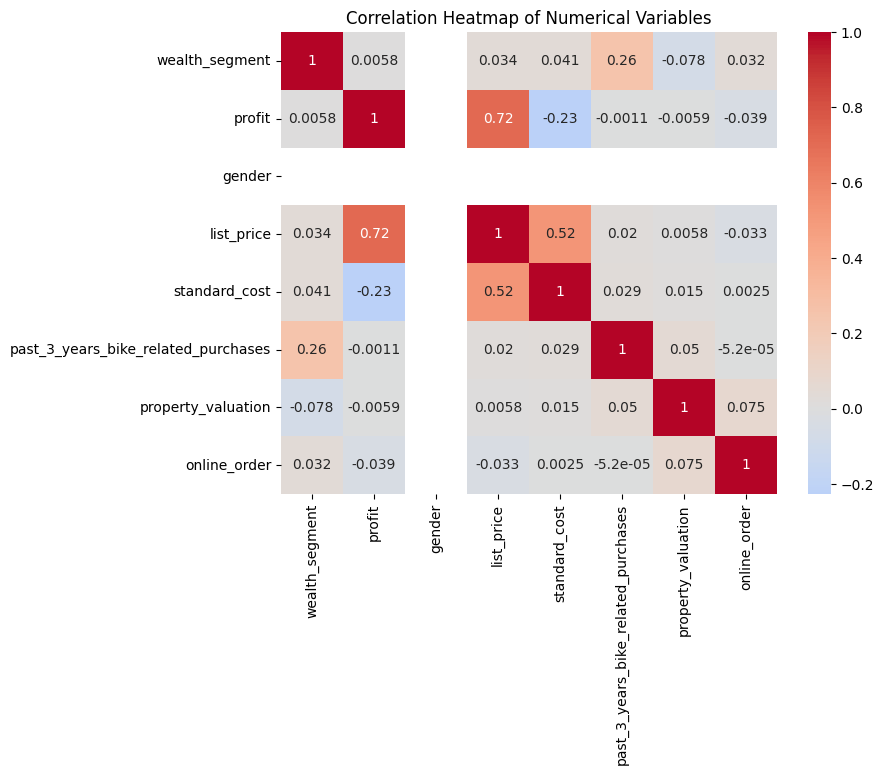

In [ ]:
numerical_columns = ['wealth_segment','profit','gender','list_price', 'standard_cost', 'past_3_years_bike_related_purchases', 'property_valuation','online_order']
correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

In [ ]:
import pandas as pd
new_data=pd.read_csv('/content/Results_cho_RFM_final_project.csv')
new_data

,customer_id,order_frequency,order_recency,order_monetary
0,1,11,7,3018.09
1,799,11,10,7142.20
2,2999,11,8,8095.20
3,1773,10,8,5397.56
4,2165,10,0,6052.93
...,...,...,...,...
74,2642,2,20,1915.87
75,2920,2,99,1774.70
76,2021,2,125,90.22
77,1628,2,133,2659.57


In [ ]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      79 non-null     int64  
 1   order_frequency  79 non-null     int64  
 2   order_recency    79 non-null     int64  
 3   order_monetary   79 non-null     float64
dtypes: float64(1), int64(3)
memory usage: 2.6 KB


(array([40.,  9.,  7.,  5.,  7.,  6.,  4.,  0.,  0.,  1.]),
 array([  0. ,  22.9,  45.8,  68.7,  91.6, 114.5, 137.4, 160.3, 183.2,
        206.1, 229. ]),
 <BarContainer object of 10 artists>)

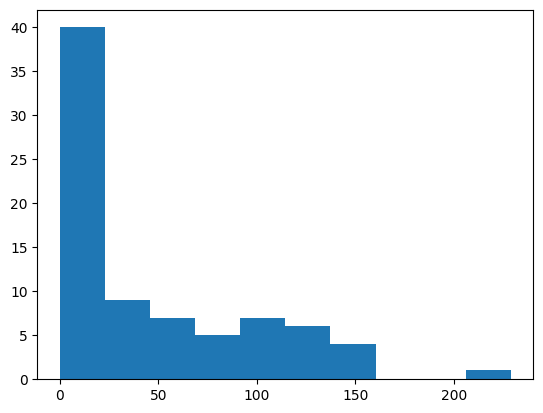

In [ ]:
import matplotlib.pyplot as plt

plt.hist(new_data['order_recency'])

(array([ 6.,  0.,  0.,  0.,  0.,  6.,  0.,  0.,  0.,  0.,  0., 15.,  0.,
         0.,  0.,  0., 11.,  0.,  0.,  0.,  0.,  0., 11.,  0.,  0.,  0.,
         0.,  8.,  0.,  0.,  0.,  0.,  0., 11.,  0.,  0.,  0.,  0.,  5.,
         0.,  0.,  0.,  0.,  0.,  3.,  0.,  0.,  0.,  0.,  3.]),
 array([ 2.  ,  2.18,  2.36,  2.54,  2.72,  2.9 ,  3.08,  3.26,  3.44,
         3.62,  3.8 ,  3.98,  4.16,  4.34,  4.52,  4.7 ,  4.88,  5.06,
         5.24,  5.42,  5.6 ,  5.78,  5.96,  6.14,  6.32,  6.5 ,  6.68,
         6.86,  7.04,  7.22,  7.4 ,  7.58,  7.76,  7.94,  8.12,  8.3 ,
         8.48,  8.66,  8.84,  9.02,  9.2 ,  9.38,  9.56,  9.74,  9.92,
        10.1 , 10.28, 10.46, 10.64, 10.82, 11.  ]),
 <BarContainer object of 50 artists>)

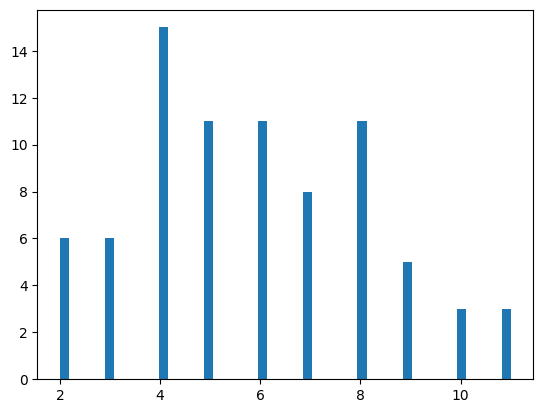

In [ ]:
plt.hist(new_data['order_frequency'],bins=50)

(array([1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 2., 1., 0., 0., 0.,
        2., 0., 1., 0., 2., 4., 1., 1., 0., 2., 1., 1., 1., 1., 0., 1., 1.,
        1., 2., 2., 2., 0., 2., 1., 0., 1., 1., 1., 2., 0., 1., 3., 0., 2.,
        3., 1., 0., 1., 0., 3., 1., 3., 2., 1., 1., 1., 0., 1., 1., 1., 0.,
        0., 0., 1., 2., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([  90.22  ,  170.2698,  250.3196,  330.3694,  410.4192,  490.469 ,
         570.5188,  650.5686,  730.6184,  810.6682,  890.718 ,  970.7678,
        1050.8176, 1130.8674, 1210.9172, 1290.967 , 1371.0168, 1451.0666,
        1531.1164, 1611.1662, 1691.216 , 1771.2658, 1851.3156, 1931.3654,
        2011.4152, 2091.465 , 2171.5148, 2251.5646, 2331.6144, 2411.6642,
        2491.714 , 2571.7638, 2651.8136, 2731.8634, 2811.9132, 2891.963 ,
        2972.0128, 3052.0626, 3132.1124, 3212.1622, 3292.212 , 3372.2618,
        3452.3116, 3532.3614, 36

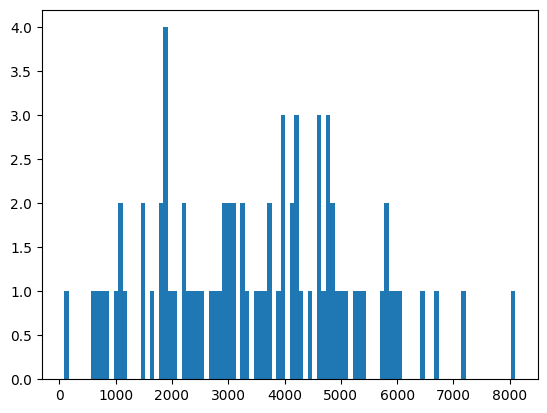

In [ ]:
plt.hist(new_data['order_monetary'],bins=100)

In [ ]:
import plotly.express as px

px.scatter(new_data, x = 'order_monetary', y = 'order_frequency', trendline = 'ols', trendline_color_override= 'red')

In [ ]:
px.scatter(new_data, x = 'order_recency', y = 'order_frequency', trendline = 'ols', trendline_color_override= 'red')

In [ ]:
px.scatter(new_data, x = 'order_monetary', y = 'order_recency', trendline = 'ols', trendline_color_override= 'red')

In [ ]:
new_data['R_score'] = pd.qcut(new_data['order_recency'], [0,0.2,0.4,0.6,0.8,1], labels = [4,3,2,1,0])

In [ ]:
new_data

,customer_id,order_frequency,order_recency,order_monetary,R_score
0,1,11,7,3018.09,4
1,799,11,10,7142.20,4
2,2999,11,8,8095.20,4
3,1773,10,8,5397.56,4
4,2165,10,0,6052.93,4
...,...,...,...,...,...
74,2642,2,20,1915.87,2
75,2920,2,99,1774.70,1
76,2021,2,125,90.22,0
77,1628,2,133,2659.57,0


In [ ]:
new_data['F_score'] = pd.qcut(new_data['order_frequency'], [0,0.2,0.4,0.6,0.8,1], labels = [0,1,2,3,4])

In [ ]:
new_data

,customer_id,order_frequency,order_recency,order_monetary,R_score,F_score
0,1,11,7,3018.09,4,4
1,799,11,10,7142.20,4,4
2,2999,11,8,8095.20,4,4
3,1773,10,8,5397.56,4,4
4,2165,10,0,6052.93,4,4
...,...,...,...,...,...,...
74,2642,2,20,1915.87,2,0
75,2920,2,99,1774.70,1,0
76,2021,2,125,90.22,0,0
77,1628,2,133,2659.57,0,0


In [ ]:
new_data['M_score'] = pd.qcut(new_data['order_monetary'], [0,0.2,0.4,0.6,0.8,1], labels = [0,1,2,3,4])

In [ ]:
new_data

,customer_id,order_frequency,order_recency,order_monetary,R_score,F_score,M_score
0,1,11,7,3018.09,4,4,2
1,799,11,10,7142.20,4,4,4
2,2999,11,8,8095.20,4,4,4
3,1773,10,8,5397.56,4,4,4
4,2165,10,0,6052.93,4,4,4
...,...,...,...,...,...,...,...
74,2642,2,20,1915.87,2,0,1
75,2920,2,99,1774.70,1,0,0
76,2021,2,125,90.22,0,0,0
77,1628,2,133,2659.57,0,0,1


<Axes: >

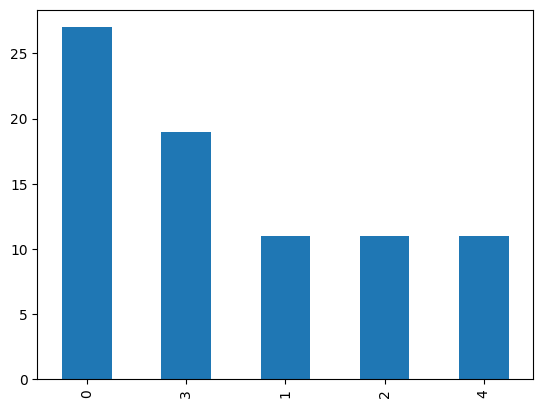

In [ ]:
new_data['F_score'].value_counts().plot(kind='bar')

In [ ]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   customer_id      79 non-null     int64   
 1   order_frequency  79 non-null     int64   
 2   order_recency    79 non-null     int64   
 3   order_monetary   79 non-null     float64 
 4   R_score          79 non-null     category
 5   F_score          79 non-null     category
 6   M_score          79 non-null     category
dtypes: category(3), float64(1), int64(3)
memory usage: 3.4 KB


In [ ]:
new_data['RFM_score'] = new_data['R_score'].astype(str) + new_data['F_score'].astype(str) + new_data['M_score'].astype(str)

In [ ]:
new_data=new_data.sort_values(by='RFM_score',ascending=False)

In [ ]:
new_data

,customer_id,order_frequency,order_recency,order_monetary,R_score,F_score,M_score,RFM_score
1,799,11,10,7142.20,4,4,4,444
4,2165,10,0,6052.93,4,4,4,444
2,2999,11,8,8095.20,4,4,4,444
3,1773,10,8,5397.56,4,4,4,444
0,1,11,7,3018.09,4,4,2,442
...,...,...,...,...,...,...,...,...
65,582,4,149,2744.60,0,0,1,001
72,3322,3,141,1066.19,0,0,0,000
67,526,3,154,1111.55,0,0,0,000
76,2021,2,125,90.22,0,0,0,000


In [ ]:
import pandas as pd

# Define the segment and scores data
data = {
    'Segment': ['Best Customer_1', 'Best Customer_2', 'Potential Loyalist', 'Promising', 'New Customers',
                'Need Attention', 'About To Churn_1', 'At Risk', 'Cannot Lose Them',
                'About to Churn_2', 'Lost customers'],
    'Scores': [['444', '443', '433', '434', '343', '344', '334'],
               ['432', '333', '324', '244', '243', '234', '233', '224'],
               ['442', '440', '441', '430', '431', '422', '421', '420', '341', '340', '331', '330', '320',
                '342', '322', '321', '312', '242', '241', '240', '231', '230', '222', '212'],
               ['414', '413', '412', '411', '410', '404', '403', '402', '314', '313', '302', '303', '304',
                '204', '203', '202'],
               ['401', '400', '311', '310', '301', '300', '200'],
               ['424', '423', '332', '323', '232', '223', '214', '213'],
               ['220', '210', '201', '110', '102', '120', '130', '140'],
               ['144', '143', '134', '133', '142', '141', '132', '131', '124', '123', '114', '113', '042',
                '041', '034', '032', '031', '024', '023', '022', '014', '013'],
               ['044', '043', '033', '103', '104', '004', '003', '002'],
               ['221', '211', '122', '121', '112', '111', '021', '012', '011', '101', '100'],
               ['000', '001', '010', '020', '030', '040']]
}

# Create the DataFrame
df_segment = pd.DataFrame(data)

# Unstack the Scores column
df_segment = df_segment.explode('Scores')

# Display the resulting DataFrame
df_segment

,Segment,Scores
0,Best Customer_1,444
0,Best Customer_1,443
0,Best Customer_1,433
0,Best Customer_1,434
0,Best Customer_1,343
...,...,...
10,Lost customers,001
10,Lost customers,010
10,Lost customers,020
10,Lost customers,030


In [ ]:
new_data_final = pd.merge(new_data,df_segment, how='inner', left_on = 'RFM_score', right_on = 'Scores' )

In [ ]:
new_data_final

,customer_id,order_frequency,order_recency,order_monetary,R_score,F_score,M_score,RFM_score,Segment,Scores
0,1068,14,4,427354,4,4,4,444,Best Customer_1,444
1,200,9,7,628099,4,4,4,444,Best Customer_1,444
2,2023,10,13,427976,4,4,4,444,Best Customer_1,444
3,729,10,1,894915,4,4,4,444,Best Customer_1,444
4,2103,10,14,687989,4,4,4,444,Best Customer_1,444
...,...,...,...,...,...,...,...,...,...,...
3488,1058,3,116,75957,0,0,0,000,Lost customers,000
3489,212,2,187,-39641,0,0,0,000,Lost customers,000
3490,521,2,154,62490,0,0,0,000,Lost customers,000
3491,3414,3,162,39972,0,0,0,000,Lost customers,000


<Axes: >

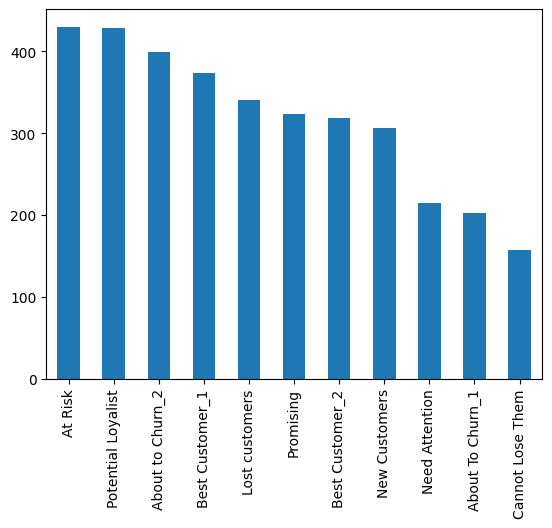

In [ ]:
import matplotlib.pyplot as plt
new_data_final['Segment'].value_counts().plot(kind='bar')

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

In [ ]:
df2.head(10)

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.81,1.0125,1.265625,1.075781,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.75,0.7500,0.937500,0.796875,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.71,0.7100,0.710000,0.710000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.50,0.6250,0.625000,0.625000,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.99,0.9900,1.237500,1.237500,4,4,1.703125
5,Druci,Brandli,Female,39,1951-04-29,Assistant Media Planner,Entertainment,High Net Worth,N,Yes,...,QLD,Australia,7,0.70,0.8750,0.875000,0.875000,6,6,1.671875
6,Rutledge,Hallt,Male,23,1976-10-06,Compensation Analyst,Financial Services,Mass Customer,N,No,...,NSW,Australia,7,0.67,0.6700,0.670000,0.569500,6,6,1.671875
7,Nancie,Vian,Female,74,1972-12-27,Human Resources Assistant II,Retail,Mass Customer,N,Yes,...,QLD,Australia,5,0.73,0.9125,0.912500,0.775625,8,8,1.656250
8,Duff,Karlowicz,Male,50,1972-04-28,Speech Pathologist,Manufacturing,Mass Customer,N,Yes,...,NSW,Australia,10,0.46,0.5750,0.718750,0.610938,8,8,1.656250
9,Barthel,Docket,Male,72,1985-08-02,Accounting Assistant IV,IT,Mass Customer,N,Yes,...,QLD,Australia,5,0.91,1.1375,1.137500,0.966875,10,10,1.640625


In [ ]:
columns_to_delete = ['Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Rank', 'Value']
df2.drop(columns_to_delete, axis=1, inplace=True)

KeyError: ignored

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

In [ ]:
import csv
import operator

In [ ]:
df2['New_customer_ID'] = range(1, len(df2) + 1)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

In [ ]:
df2_new=df2[['New_customer_ID','first_name', 'last_name','gender','past_3_years_bike_related_purchases','DOB','job_title','job_industry_category','wealth_segment','deceased_indicator','owns_car','tenure','postcode','state','country','property_valuation']]

In [ ]:
df2_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   New_customer_ID                      1000 non-null   int64         
 1   first_name                           1000 non-null   object        
 2   last_name                            971 non-null    object        
 3   gender                               1000 non-null   object        
 4   past_3_years_bike_related_purchases  1000 non-null   int64         
 5   DOB                                  983 non-null    datetime64[ns]
 6   job_title                            894 non-null    object        
 7   job_industry_category                835 non-null    object        
 8   wealth_segment                       1000 non-null   object        
 9   deceased_indicator                   1000 non-null   object        
 10  owns_car     

In [ ]:
df2_new.head(10)

,New_customer_ID,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,postcode,state,country,property_valuation
0,1,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,4500,QLD,Australia,6
1,2,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,2113,NSW,Australia,11
2,3,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,3505,VIC,Australia,5
3,4,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,4814,QLD,Australia,1
4,5,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,2093,NSW,Australia,9
5,6,Druci,Brandli,Female,39,1951-04-29,Assistant Media Planner,Entertainment,High Net Worth,N,Yes,22,4075,QLD,Australia,7
6,7,Rutledge,Hallt,Male,23,1976-10-06,Compensation Analyst,Financial Services,Mass Customer,N,No,8,2620,NSW,Australia,7
7,8,Nancie,Vian,Female,74,1972-12-27,Human Resources Assistant II,Retail,Mass Customer,N,Yes,10,4814,QLD,Australia,5
8,9,Duff,Karlowicz,Male,50,1972-04-28,Speech Pathologist,Manufacturing,Mass Customer,N,Yes,5,2200,NSW,Australia,10
9,10,Barthel,Docket,Male,72,1985-08-02,Accounting Assistant IV,IT,Mass Customer,N,Yes,17,4151,QLD,Australia,5


In [1]:
output_filename = 'newcustomerlist_ordered.csv'
df2_new.to_csv(output_filename, index=False)

NameError: ignored